# язык программирования Python
## часть IV - некоторые тонкости

автор: **Дьяконов Александр www.dyakonov.org**

**для поддержки курсов автора, в частности https://github.com/Dyakonov/IML**


### материал основан на...
книге ***Дэн Бейдер*** **Чистый Python. Тонкости программирования для профи**. Питер, 2018.

### assert

Инструкции assert должны применяться только для того, чтобы помогать разработчикам идентифицировать ошибки. Они не являются механизмом обработки ошибок периода исполнения программы.

## типичная ошибка - пропущенная запятая

In [2]:
lst = ['Петя',
      'Маша'
      'Вася'
      ]

lst

['Петя', 'МашаВася']

## менеджер контекста

эквивалентные куски кода

In [ ]:
with open('hello.txt', 'w') as f:
    f.write('привет, мир!')


f = open('hello.txt', 'w')
try:
    f.write('привет, мир!')
finally:
    f.close()

In [3]:
class Indenter:
    def __init__(self):
        self.level = 0
    
    def __enter__(self):
        self.level += 1
        return self
    
    def __exit__(self, exc_type, exc_val, exc_tb):
        self.level -= 1
    
    def print(self, text):
        print(' ' * self.level + text)
        

with Indenter() as indent:
    indent.print('раз')
    with indent:
        indent.print('два')
        with indent:
            indent.print('три')
    indent.print('четыре')

 раз
  два
   три
 четыре


## именования переменных



«дандеры» (dunders — это сокращение от англ. double underscores)  - с двойным подчёркиванием

In [ ]:
_var = 1 # для внутреннего пользования, не импортируются from my_module import *
var_ = 1 # чтобы избежать конфликта имён
__var = 1 # искажением имени (name mangling)
__var__ = 1 # не будет искажения! Зарезервированы: __init__, __call__ и т.п.
_ = 1 # неважное имя переменной (чаще при распаковке) часто: результат последнего выражения


# форматирование строк

In [1]:
name = 'Иван'
print ('Привет, %s' % name)
print ('Привет, {}'.format(name))
print (f'Привет, {name}') # форматированные строковые литералы (Formatted String Literals).

from string import Template
print (Template('Привет, $name').substitute(name=name)) # шаблонные строки

Привет, Иван
Привет, Иван
Привет, Иван
Привет, Иван


## лямбда-функции

In [7]:
(lambda x, y: x + y)(1, 2)

3

In [55]:
tuples = [(1, 'ONE'), (4, 'FOUR'), (-1, 'MINUS ONE'), (-2, 'MINUS TWO')]

print (sorted(tuples, key=lambda x: x[0]))  # так по умолчанию!
print (sorted(tuples, key=lambda x: x[0]*x[0]))

[(-2, 'MINUS TWO'), (-1, 'MINUS ONE'), (1, 'ONE'), (4, 'FOUR')]
[(1, 'ONE'), (-1, 'MINUS ONE'), (-2, 'MINUS TWO'), (4, 'FOUR')]


In [60]:
import operator
sorted(tuples, key=operator.itemgetter(0))

[(-2, 'MINUS TWO'), (-1, 'MINUS ONE'), (1, 'ONE'), (4, 'FOUR')]

In [11]:
sorted(tuples)

[(-2, 'MINUS TWO'), (-1, 'MINUS ONE'), (1, 'ONE'), (4, 'FOUR')]

In [13]:
list(filter(lambda x: x % 2 == 0, range(16)))

[0, 2, 4, 6, 8, 10, 12, 14]

In [14]:
[x for x in range(16) if x % 2 == 0]

[0, 2, 4, 6, 8, 10, 12, 14]

In [15]:
tuples = [(1, 'ONE'), (4, 'FOUR'), (-1, 'MINUS ONE'), (-2, 'MINUS TWO')]

print (sorted(tuples, key=lambda x: x[1]))  # так по умолчанию!

[(4, 'FOUR'), (-1, 'MINUS ONE'), (-2, 'MINUS TWO'), (1, 'ONE')]


# декораторы

In [24]:
def dec_upper(f):
    return lambda: f().upper()

def dec_lower(f):
    return lambda: f().lower()

@dec_upper
@dec_lower
def say():
    return('Hello!') # ' + x + '

say()

'HELLO!'

In [29]:
def dec_upper(f):
    def g(*args, **kwargs):
        return f(*args, **kwargs).upper()
    return g

def dec_lower(f):
    def g(*args, **kwargs):
        return f(*args, **kwargs).lower()
    return g

@dec_upper
@dec_lower
def say(x):
    return('Hello' + x + '!') # ' + x + '

say('Mike')

'HELLOMIKE!'

## необязательные аргументы

In [21]:
def f(z, *x):
    print (x)
    
f(1)

()


# распаковка аргументов

In [33]:
def print_vec(x, y, z):
    print('<%s, %s, %s>' % (x, y, z))
    
lst = [1, 2, 3]
tpl = (4, 5, 6)
gen = (i*i for i in range(3))

print_vec(*lst)
print_vec(*tpl)
print_vec(*gen)


dct = {'y': 10, 'z': 20, 'x': 30}
print_vec(*dct)
print_vec(**dct)

<1, 2, 3>
<4, 5, 6>
<0, 1, 4>
<y, z, x>
<30, 10, 20>


## ООП

In [34]:
a = [1, 2]
b = [1].append(2)
c = [1, 2]

a == b, a is b, a == c, a is c, a, b, c

(False, False, True, False, [1, 2], None, [1, 2])

## что возвращает функция

In [35]:
def f(x, y):
    z = x + y
    
print (f(1, 2))

None


# описание функции

In [36]:
class MyClass:
    """
    __comment__
    """
    def __init__(self, var):
        self.var = var
    def __repr__(self):
        # для разработчиков
        return '__repr__ %g' % self.var
    def __str__(self):
        # удобочитаемо
        return '__str__ %g' % self.var

mc = MyClass(2)
print (mc)
print (MyClass)
help(mc)
mc

__str__ 2
<class '__main__.MyClass'>
Help on MyClass in module __main__ object:

class MyClass(builtins.object)
 |  __comment__
 |  
 |  Methods defined here:
 |  
 |  __init__(self, var)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



__repr__ 2

In [37]:
str(mc)

'__str__ 2'

## копирование

In [39]:
x = [[1], [2]]
y = list(x)
x.append([3])
x[0].append(4)
print (x)
print (y)

[[1, 4], [2], [3]]
[[1, 4], [2]]


## переменные класса и экземпляра

In [40]:
class My:
    a = 2 # переменная класса
    def __init__(self, b):
        self.b = b # переменная экземпляра
        
print (My.a)
m = My(10)
print (m.a, m.b)
m2 = My(20)
m.a = 0
print (m.a, m.b, m2.a, m2.b, My.a)

2
2 10
0 10 2 20 2


In [41]:
class My:
    a = 2 # переменная класса
    def __init__(self, b):
        self.b = b # переменная экземпляра
        
m = My(0)
m.a = 10
m.b = 20
My.a = 30
# m = My(0)
print (m.a, m.b)

10 20


In [42]:
class MyClass:
    def method(self):
        return 'вызван метод экземпляра', self
    @classmethod
    def classmethod(cls):
        return 'вызван метод класса', cls
    @staticmethod
    def staticmethod():
        return 'вызван статический метод'

In [43]:
obj = MyClass()
obj.method()

('вызван метод экземпляра', <__main__.MyClass at 0x7f3a8f1ce8d0>)

In [44]:
MyClass.method(obj)

('вызван метод экземпляра', <__main__.MyClass at 0x7f3a8f1ce8d0>)

In [45]:
obj.classmethod()

('вызван метод класса', __main__.MyClass)

In [46]:
obj.staticmethod()

# статические методы не могут получить доступ ни к состоянию экземпляра объекта, ни к состоянию класса

'вызван статический метод'

In [47]:
MyClass.classmethod()

('вызван метод класса', __main__.MyClass)

In [49]:
MyClass.staticmethod()

'вызван статический метод'

In [50]:
MyClass.method()

TypeError: method() missing 1 required positional argument: 'self'

# словари

In [6]:
dict({(1, 2): [1, 2]})

{(1, 2): [1, 2]}

In [63]:
{True: 'да', 1: 'нет', 1.0: 'возможно'}

{True: 'возможно'}

In [64]:
True == 1 == 1.0

True

# словарь с порядком

In [7]:
# словарь с порядком ключей
import collections 
d = collections.OrderedDict(one=1, two=2, three=3)
d

OrderedDict([('one', 1), ('two', 2), ('three', 3)])

In [12]:
# словарь со значение по умолчанию
import collections 
d = collections.defaultdict(list, one=1, two=2, three=3, default='111')
d['one'], d['2'] # по умолчанию - пустой список

(1, [])

In [14]:
# словари -> в один словарь
from collections import ChainMap 
d1 = {1:1, 2:2}
d2 = {2:3, 3:4}
d3 = {3:5, 4:6}
cm = ChainMap(d1, d2, d3)

cm[1], cm[2], cm[3], cm[4]

(1, 2, 4, 6)

# кортежи

In [19]:
a = ()
# b = (,)
c = (1,)
#d = (,1)
e = (1)

a, c, e

((), (1,), 1)

In [20]:
a  + c

(1,)

## типизированные массивы

In [21]:
import array 
arr = array.array('f', (1.0, 1.5, 2.0, 2.5))
arr, arr[:2]

(array('f', [1.0, 1.5, 2.0, 2.5]), array('f', [1.0, 1.5]))

# строки

In [22]:
s1 = '123'
s2 = '45'
s1 + s2
#s1[4]
s1[-1]
# (s1 s2)
# del s1[1]

'3'

## именнованный список

In [31]:
# именнованный список
from collections import namedtuple 
Car = namedtuple('Авто' , 'цвет пробег автомат')
print (Car('red', '1200', True))

Авто(цвет='red', пробег='1200', автомат=True)


In [32]:
# Python 3.x
from typing import NamedTuple
class Car(NamedTuple):
    цвет: str
    пробег: float
    автомат: bool
print (Car('red', '1200', True))

Car(цвет='red', пробег='1200', автомат=True)


# мультимножество

In [35]:
from collections import Counter 

inventory = Counter() 
loot = {'клинок': 1, 'хлеб': 3} 
inventory.update(loot) 
inventory 

Counter({'клинок': 1, 'хлеб': 3})

In [36]:
inventory.update({'клинок': 1, 'яблоко': 1}) 
inventory

Counter({'клинок': 2, 'хлеб': 3, 'яблоко': 1})

In [40]:
len(inventory), sum(inventory.values())

(3, 6)

# очередь с двусторониим доступом

In [41]:
# для очереди FIFO - лучше использовать это!

from collections import deque
# LifoQueue - в параллельных вычислениях
s = deque() 
s.append('1') 
s.append('2') 
s.pop(), s.pop()

('2', '1')

In [42]:
s = deque() 
s.append('1') 
s.append('2') 
s.popleft(), s.popleft()

('1', '2')

# очереди с приоритетом

In [43]:
from queue import PriorityQueue 
q = PriorityQueue()
q.put((2, 'b')) 
q.put((1, 'a')) 
q.put((3, 'c'))
while not q.empty():
    next_item = q.get()
    print(next_item)

(1, 'a')
(2, 'b')
(3, 'c')


## списки

In [45]:
# очистка списка
lst = [1, 2, 3]
del lst[:]
print (lst)

lst = [1, 2, 3]
lst.clear()
print (lst)


[]
[]


# генераторы

In [46]:
def repeater(value):
    while True:
        yield value

In [54]:
vals = range(3) 
squared = (i * i for i in vals) 
negated = (-i for i in squared)
list(negated)

[0, -1, -4]

## когда функции  - элементы списка

Populating the interactive namespace from numpy and matplotlib


/home/dash/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/home/dash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


(0.0, 2.0)

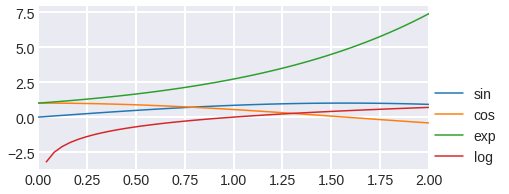

In [6]:
import pandas as pd
import numpy as np
# для встроенных картинок
%pylab inline
# чуть покрасивше картинки:
plt.style.use('seaborn-dark')
import matplotlib.pyplot as plt
plt.rc('font', size=14)

plt.figure(figsize=(7, 3))
x = np.linspace(0, 2)
for f in [np.sin, np.cos, np.exp, np.log]:
    plt.plot(x, f(x), label=f.__name__)
plt.legend(loc=(1,0))
plt.grid(lw=2)
plt.xlim(x.min(), x.max())